In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#read the file
df =  pd.read_csv('/content/drive/MyDrive/data/covid-world-data-11-2024.csv')

unique_countries = df['country'].nunique()
print(f"Number of unique countries: {unique_countries}")

Number of unique countries: 262


In [ ]:
print(df.columns)

Index(['country', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'excess_mortality', 'excess_mortality_cumulative',
       'excess_mortality_cumulative_absolute',
       'excess_mortality_cumulative_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'icu_patients',
       'icu_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'stringency_index',
       'reproduction_rate', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'total_vaccinations',
    

In [ ]:
df.head()

,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
0,Afghanistan,1/1/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578846.0,62.215546,16.752,61.9824,1516.2733,NaN,10.9,48.214695,0.39,0.462
1,Afghanistan,1/2/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578846.0,62.215546,16.752,61.9824,1516.2733,NaN,10.9,48.214695,0.39,0.462
2,Afghanistan,1/3/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578846.0,62.215546,16.752,61.9824,1516.2733,NaN,10.9,48.214695,0.39,0.462
3,Afghanistan,1/4/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578846.0,62.215546,16.752,61.9824,1516.2733,NaN,10.9,48.214695,0.39,0.462
4,Afghanistan,1/5/2020,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,40578846.0,62.215546,16.752,61.9824,1516.2733,NaN,10.9,48.214695,0.39,0.462


In [ ]:
# Fill NaN values in key columns with 0 (as they represent counts)
df['new_cases'] = df['new_cases'].fillna(0)
df['new_deaths'] = df['new_deaths'].fillna(0)
df['new_cases_smoothed'] = df['new_cases'].fillna(0)
df['new_deaths_smoothed'] = df['new_deaths'].fillna(0)
df['total_cases'] = df['total_cases'].fillna(0)

df['new_cases_per_million'] = df['new_cases_per_million'].fillna(0)
df['new_deaths_per_million'] = df['new_deaths_per_million'].fillna(0)
df['population'] = df['population'].fillna(0)
df.head()

,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
0,Afghanistan,1/1/2020,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,...,40578846.0,62.215546,16.752,61.9824,1516.2733,NaN,10.9,48.214695,0.39,0.462
1,Afghanistan,1/2/2020,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,...,40578846.0,62.215546,16.752,61.9824,1516.2733,NaN,10.9,48.214695,0.39,0.462
2,Afghanistan,1/3/2020,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,...,40578846.0,62.215546,16.752,61.9824,1516.2733,NaN,10.9,48.214695,0.39,0.462
3,Afghanistan,1/4/2020,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,...,40578846.0,62.215546,16.752,61.9824,1516.2733,NaN,10.9,48.214695,0.39,0.462
4,Afghanistan,1/5/2020,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,...,40578846.0,62.215546,16.752,61.9824,1516.2733,NaN,10.9,48.214695,0.39,0.462


In [ ]:
#dropping rows where the data and country had NaB
df = df.dropna(subset=['date', 'country'])
df.head()

,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
0,Afghanistan,1/1/2020,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,...,40578846.0,62.215546,16.752,61.9824,1516.2733,NaN,10.9,48.214695,0.39,0.462
1,Afghanistan,1/2/2020,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,...,40578846.0,62.215546,16.752,61.9824,1516.2733,NaN,10.9,48.214695,0.39,0.462
2,Afghanistan,1/3/2020,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,...,40578846.0,62.215546,16.752,61.9824,1516.2733,NaN,10.9,48.214695,0.39,0.462
3,Afghanistan,1/4/2020,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,...,40578846.0,62.215546,16.752,61.9824,1516.2733,NaN,10.9,48.214695,0.39,0.462
4,Afghanistan,1/5/2020,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,...,40578846.0,62.215546,16.752,61.9824,1516.2733,NaN,10.9,48.214695,0.39,0.462


In [ ]:
#selected 17 countries for analysis

#added 7 other countries to the chosen 13 countries
countries = [
    'Australia', 'Brazil', 'France', 'Germany', 'United Kingdom', 'India',
    'Italy', 'Peru', 'South Africa', 'South Korea', 'Sweden', 'Taiwan', 'United States',
    'Canada', 'Japan', 'Egypt', 'China'
]

In [ ]:
# Filter the DataFrame to include only the selected countries
df = df[df['country'].isin(countries)]

In [ ]:
# Verified the unique countries in the filtered dataset
print(df['country'].unique())

['Australia' 'Brazil' 'Canada' 'China' 'Egypt' 'France' 'Germany' 'India'
 'Italy' 'Japan' 'Peru' 'South Africa' 'South Korea' 'Sweden' 'Taiwan'
 'United Kingdom' 'United States']


In [ ]:
# Converted the date column to datetime format
#year/month/day
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Sort values by date and country
df = df.sort_values(by=['country', 'date'])

# Set the date as the index
df.set_index('date', inplace=True)

In [ ]:
# Temporarily reset the index to access 'date' as a column
df.reset_index()


,date,country,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
0,2020-01-01,Australia,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,...,26200987.0,3.406256,37.512,84.5265,51090.260,0.497094,6.4,NaN,3.84,0.946
1,2020-01-02,Australia,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,...,26200987.0,3.406256,37.512,84.5265,51090.260,0.497094,6.4,NaN,3.84,0.946
2,2020-01-03,Australia,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,...,26200987.0,3.406256,37.512,84.5265,51090.260,0.497094,6.4,NaN,3.84,0.946
3,2020-01-04,Australia,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,...,26200987.0,3.406256,37.512,84.5265,51090.260,0.497094,6.4,NaN,3.84,0.946
4,2020-01-05,Australia,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,...,26200987.0,3.406256,37.512,84.5265,51090.260,0.497094,6.4,NaN,3.84,0.946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29688,2024-12-01,United States,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,...,341534041.0,37.336650,37.720,77.1982,64623.125,1.249186,10.7,NaN,2.87,0.927
29689,2024-12-08,United States,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,...,341534041.0,37.336650,37.720,77.1982,64623.125,1.249186,10.7,NaN,2.87,0.927
29690,2024-12-15,United States,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,...,341534041.0,37.336650,37.720,77.1982,64623.125,1.249186,10.7,NaN,2.87,0.927
29691,2024-12-22,United States,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,...,341534041.0,37.336650,37.720,77.1982,64623.125,1.249186,10.7,NaN,2.87,0.927


In [ ]:
df.head()

,country,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,new_deaths_smoothed,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,Australia,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,...,26200987.0,3.406256,37.512,84.5265,51090.26,0.497094,6.4,NaN,3.84,0.946
2020-01-02,Australia,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,...,26200987.0,3.406256,37.512,84.5265,51090.26,0.497094,6.4,NaN,3.84,0.946
2020-01-03,Australia,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,...,26200987.0,3.406256,37.512,84.5265,51090.26,0.497094,6.4,NaN,3.84,0.946
2020-01-04,Australia,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,...,26200987.0,3.406256,37.512,84.5265,51090.26,0.497094,6.4,NaN,3.84,0.946
2020-01-05,Australia,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,26200987.0,3.406256,37.512,84.5265,51090.26,0.497094,6.4,NaN,3.84,0.946


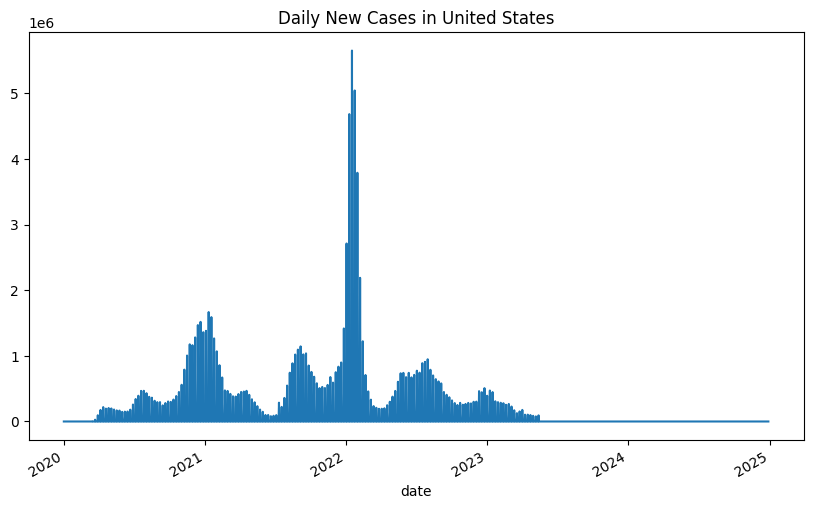

In [ ]:
# Example for one country
country_data = df[df['country'] == 'United States']
country_data['new_cases'].plot(figsize=(10, 6), title='Daily New Cases in United States')
plt.show()

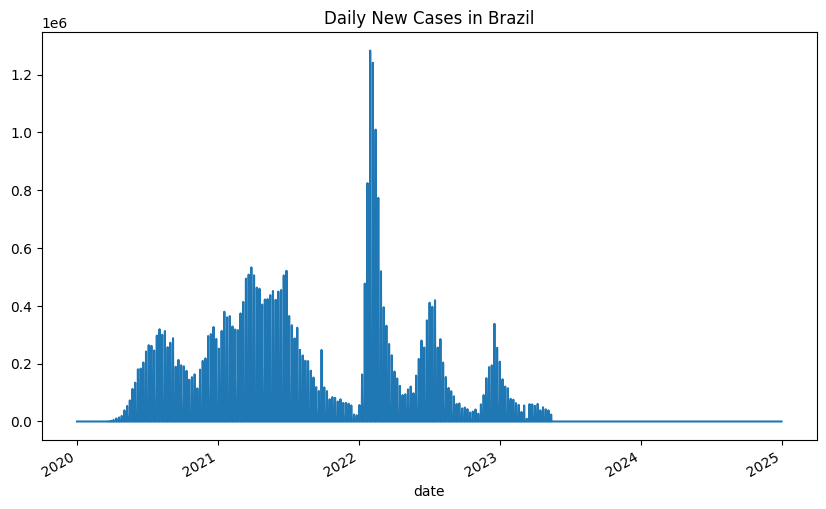

In [ ]:
country_data = df[df['country'] == 'Brazil']
country_data['new_cases'].plot(figsize=(10, 6), title='Daily New Cases in Brazil')
plt.show()

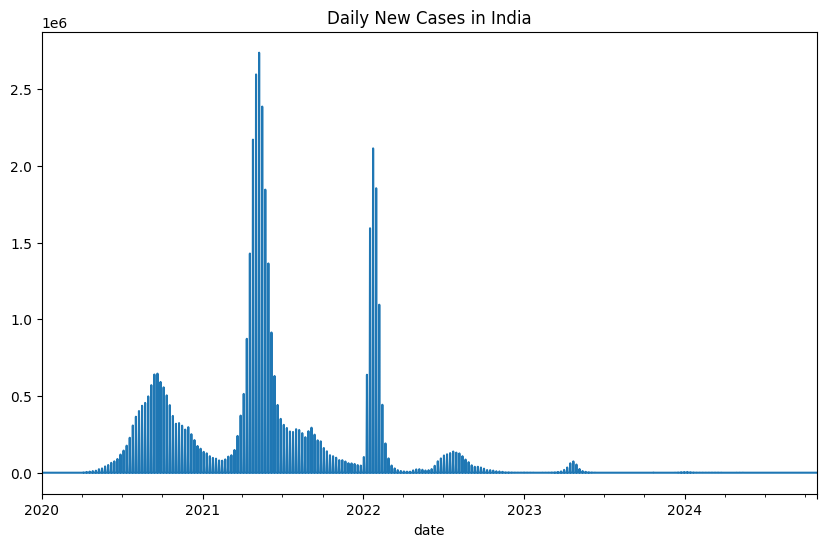

In [ ]:
country_data = df[df['country'] == 'India']
country_data['new_cases'].plot(figsize=(10, 6), title='Daily New Cases in India')
plt.show()

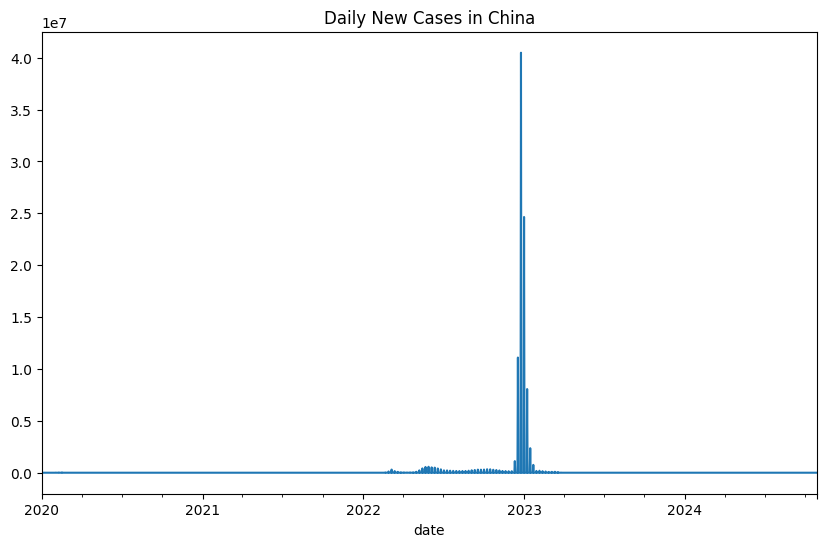

In [ ]:
country_data = df[df['country'] == 'China']
country_data['new_cases'].plot(figsize=(10, 6), title='Daily New Cases in China')
plt.show()

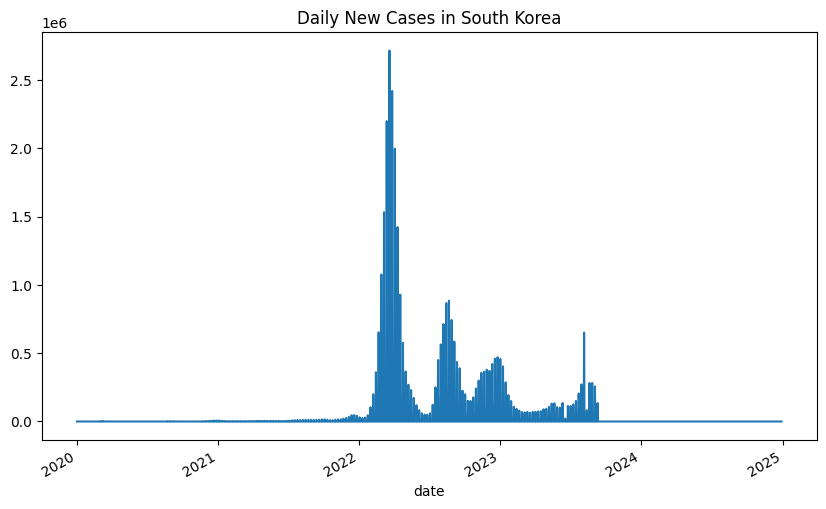

In [ ]:
country_data = df[df['country'] == 'South Korea']
country_data['new_cases'].plot(figsize=(10, 6), title='Daily New Cases in South Korea')
plt.show()

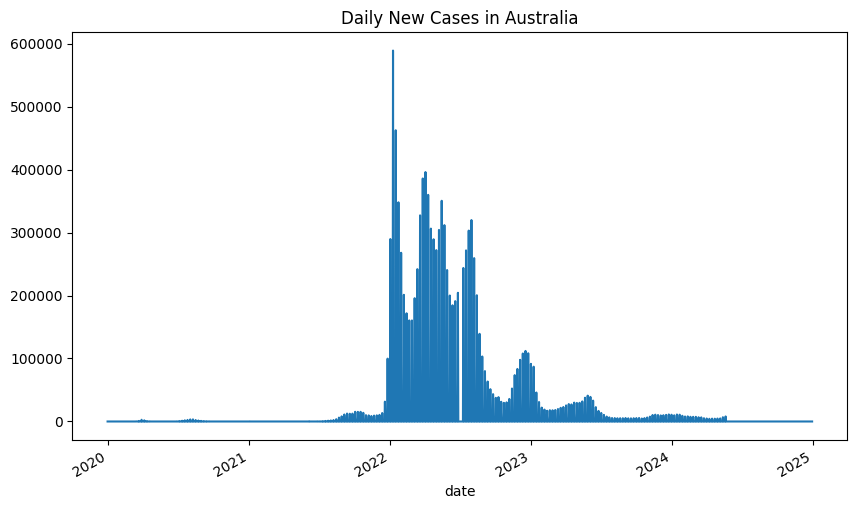

In [ ]:
country_data = df[df['country'] == 'Australia']
country_data['new_cases'].plot(figsize=(10, 6), title='Daily New Cases in Australia')

plt.show()

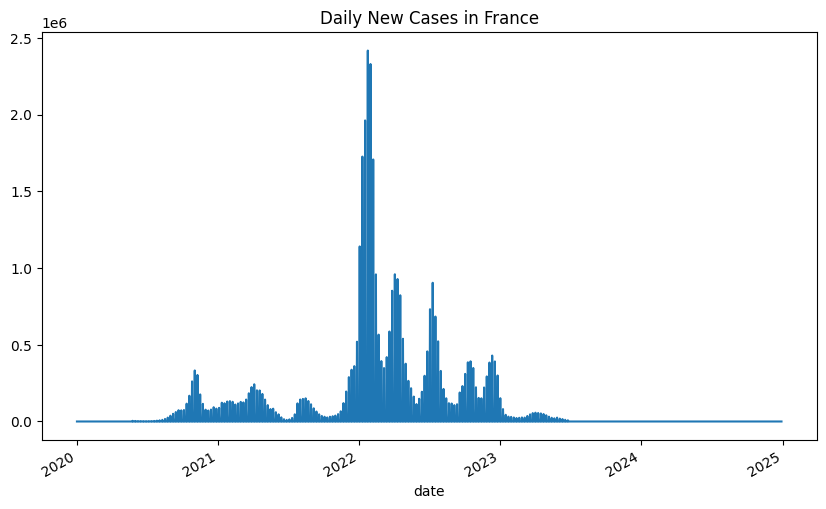

In [ ]:
country_data = df[df['country'] == 'France']
country_data['new_cases'].plot(figsize=(10, 6), title='Daily New Cases in France')
plt.show()

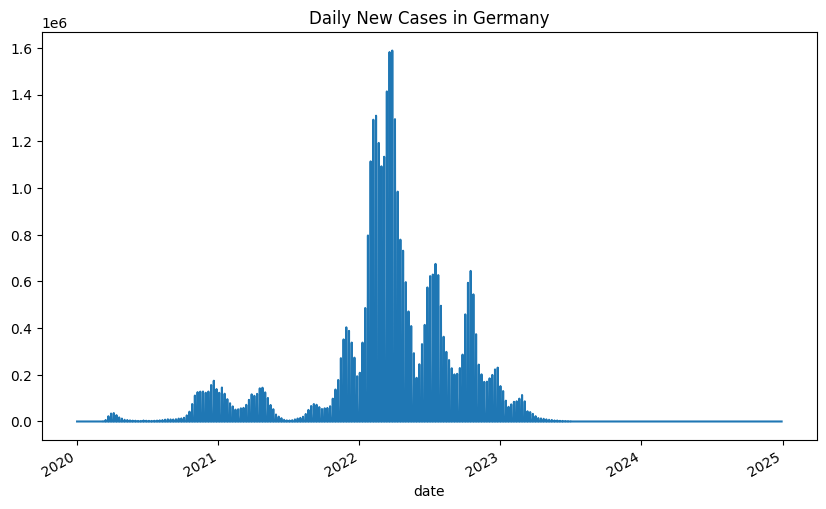

In [ ]:
country_data = df[df['country'] == 'Germany']
country_data['new_cases'].plot(figsize=(10, 6), title='Daily New Cases in Germany')
plt.show()

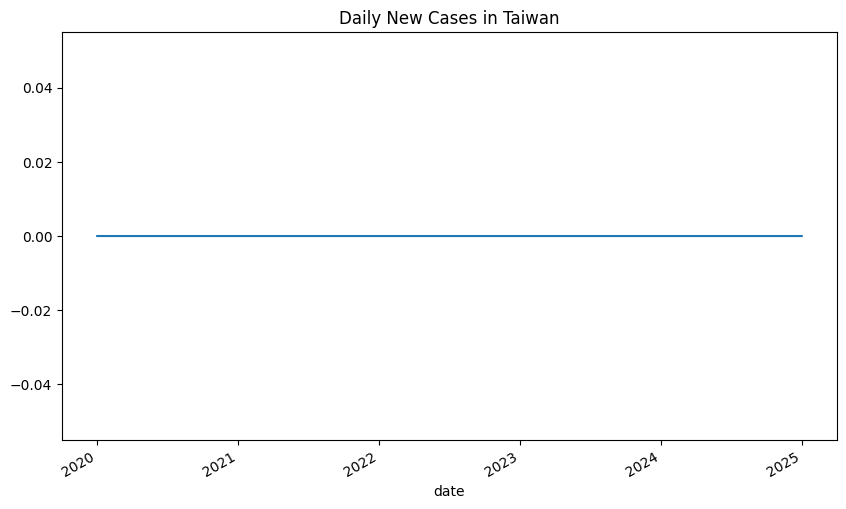

In [ ]:
country_data = df[df['country'] == 'Taiwan']
country_data['new_cases'].plot(figsize=(10, 6), title='Daily New Cases in Taiwan')
plt.show()

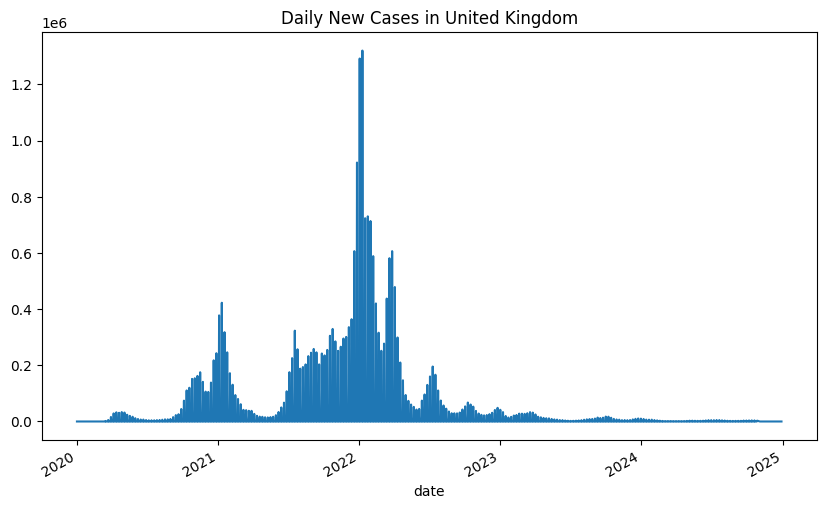

In [ ]:
country_data = df[df['country'] == 'United Kingdom']
country_data['new_cases'].plot(figsize=(10, 6), title='Daily New Cases in United Kingdom')
plt.show()

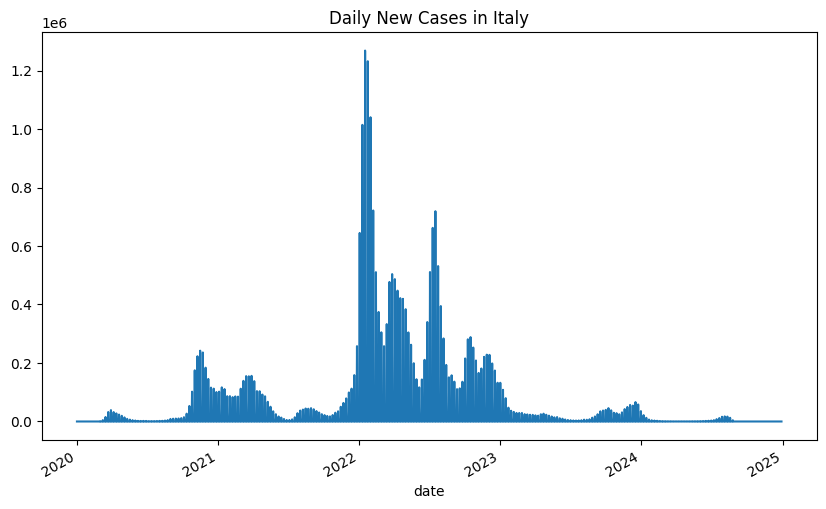

In [ ]:
country_data = df[df['country'] == 'Italy']
country_data['new_cases'].plot(figsize=(10, 6), title='Daily New Cases in Italy')
plt.show()

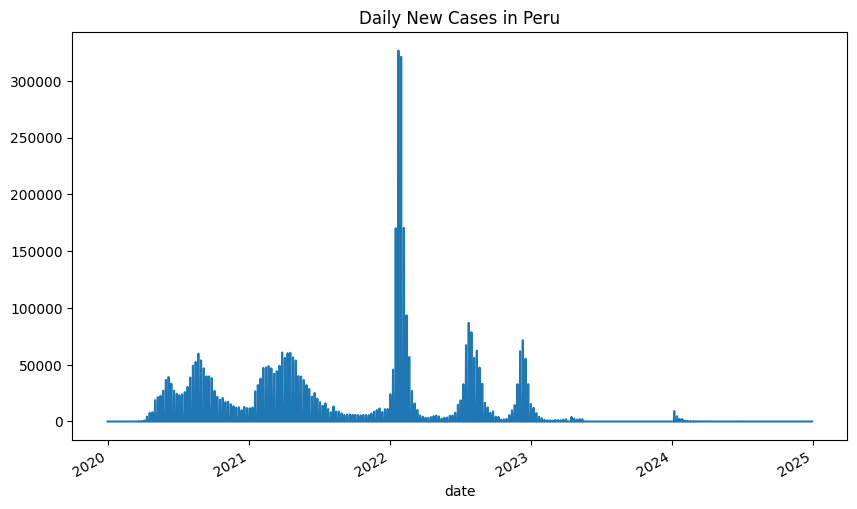

In [ ]:
country_data = df[df['country'] == 'Peru']
country_data['new_cases'].plot(figsize=(10, 6), title='Daily New Cases in Peru')
plt.show()

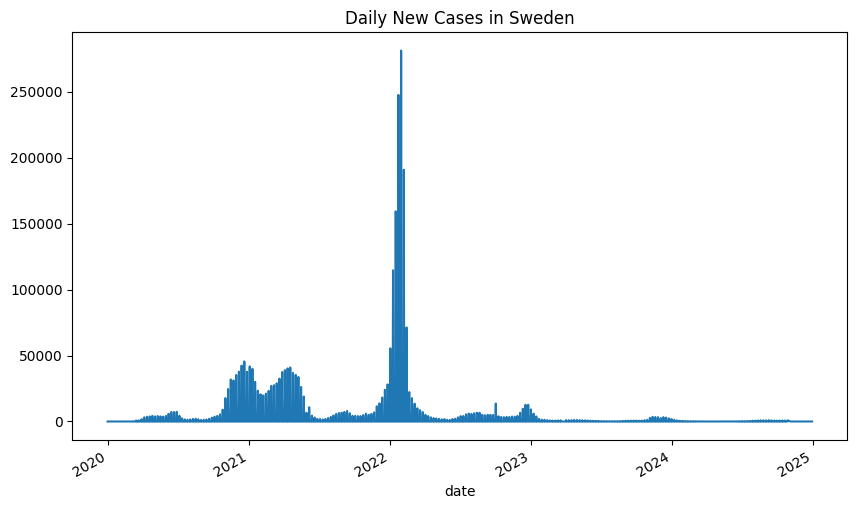

In [ ]:
country_data = df[df['country'] == 'Sweden']
country_data['new_cases'].plot(figsize=(10, 6), title='Daily New Cases in Sweden')
plt.show()

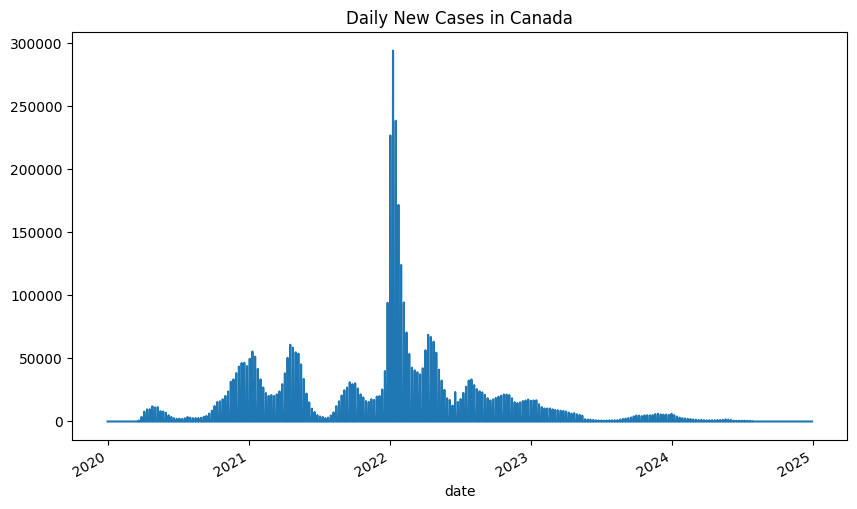

In [ ]:
country_data = df[df['country'] == 'Canada']
country_data['new_cases'].plot(figsize=(10, 6), title='Daily New Cases in Canada')
plt.show()

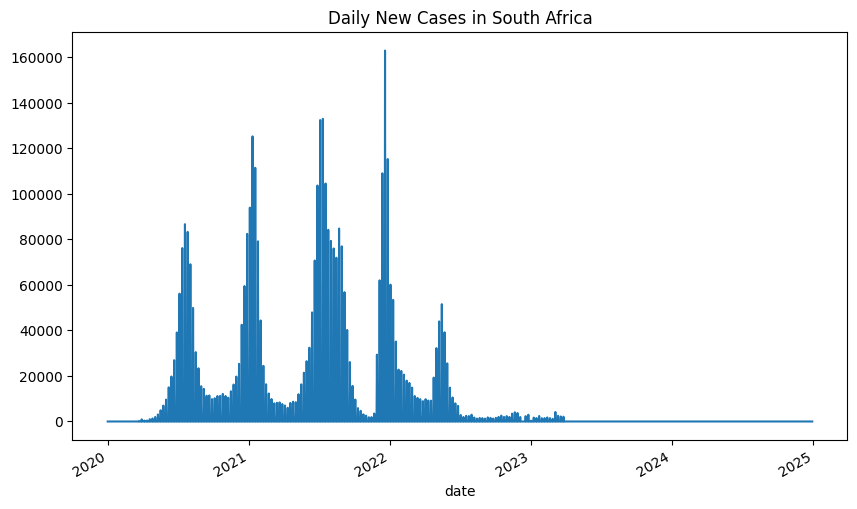

In [ ]:
country_data = df[df['country'] == 'South Africa']
country_data['new_cases'].plot(figsize=(10, 6), title='Daily New Cases in South Africa')
plt.show()

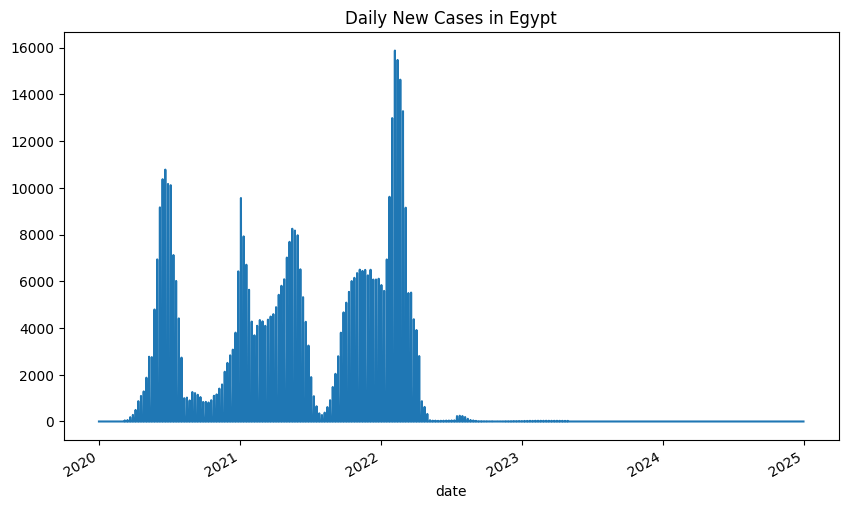

In [ ]:
country_data = df[df['country'] == 'Egypt']
country_data['new_cases'].plot(figsize=(10, 6), title='Daily New Cases in Egypt')
plt.show()

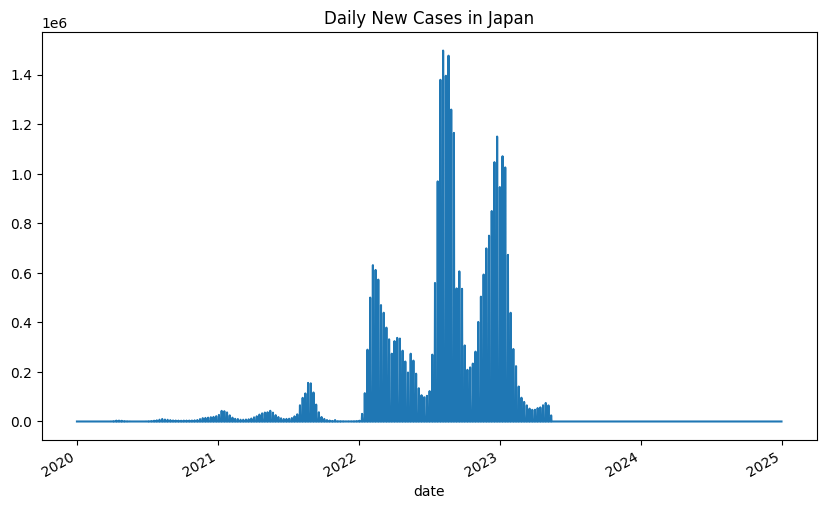

In [ ]:
country_data = df[df['country'] == 'Japan']
country_data['new_cases'].plot(figsize=(10, 6), title='Daily New Cases in Japan')
plt.show()

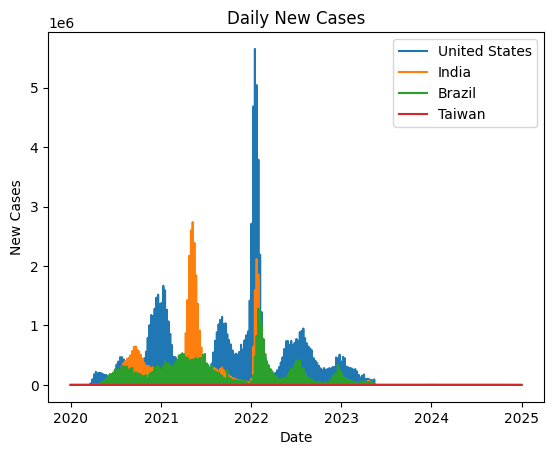

In [ ]:
selected_countries = ['United States', 'India', 'Brazil', 'Taiwan']
for country in selected_countries:
    country_data = df[df['country'] == country]
    plt.plot(country_data.index, country_data['new_cases'], label=country)

plt.title('Daily New Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.show()


In [ ]:
print(df.describe())


        total_cases     new_cases  new_cases_smoothed  \
count  2.969300e+04  2.969300e+04        2.969300e+04   
mean   1.667574e+07  1.722907e+04        1.722907e+04   
std    2.465248e+07  3.081949e+05        3.081949e+05   
min    0.000000e+00  0.000000e+00        0.000000e+00   
25%    3.590640e+05  0.000000e+00        0.000000e+00   
50%    4.167400e+06  0.000000e+00        0.000000e+00   
75%    2.688962e+07  0.000000e+00        0.000000e+00   
max    1.034368e+08  4.047548e+07        4.047548e+07   

       total_cases_per_million  new_cases_per_million  \
count             28128.000000           29693.000000   
mean             153684.493101             149.761389   
std              179910.927553            1201.407146   
min                   0.000000               0.000000   
25%                5227.655000               0.000000   
50%               69687.010000               0.000000   
75%              267708.030000               0.000000   
max              667636.060000

In [ ]:
# Smooth data using a 7-day moving average
#rolling calculates the moving average
df['new_cases_smoothed'] = df.groupby('country')['new_cases'].transform(lambda x: x.rolling(7, min_periods=1).mean())
df['new_deaths_smoothed'] = df.groupby('country')['new_deaths'].transform(lambda x: x.rolling(7, min_periods=1).mean())


In [ ]:
# Shifted new deaths by 14 days to align with corresponding cases
df['new_deaths_shifted'] = df.groupby('country')['new_deaths_smoothed'].shift(-14)


In [ ]:
# Display a subset of the DataFrame to confirm the shift
print(df[['country', 'new_cases', 'new_deaths', 'new_deaths_smoothed', 'new_deaths_shifted']].head(50))


              country  new_cases  new_deaths  new_deaths_smoothed  \
date                                                                
2020-01-01  Australia        0.0         0.0                  0.0   
2020-01-02  Australia        0.0         0.0                  0.0   
2020-01-03  Australia        0.0         0.0                  0.0   
2020-01-04  Australia        0.0         0.0                  0.0   
2020-01-05  Australia        0.0         0.0                  0.0   
2020-01-06  Australia        0.0         0.0                  0.0   
2020-01-07  Australia        0.0         0.0                  0.0   
2020-01-08  Australia        0.0         0.0                  0.0   
2020-01-09  Australia        0.0         0.0                  0.0   
2020-01-10  Australia        0.0         0.0                  0.0   
2020-01-11  Australia        0.0         0.0                  0.0   
2020-01-12  Australia        0.0         0.0                  0.0   
2020-01-13  Australia        0.0  

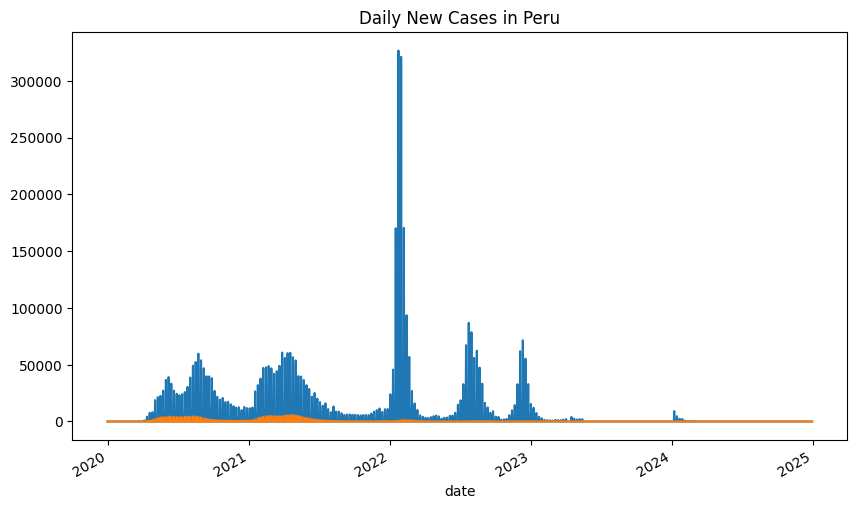

In [ ]:
country_data = df[df['country'] == 'Peru']
country_data['new_cases'].plot(figsize=(10, 6), title='Daily New Cases in Peru')
country_data['new_deaths'].plot(figsize=(10, 6), title='Daily New Cases in Peru')

plt.show()

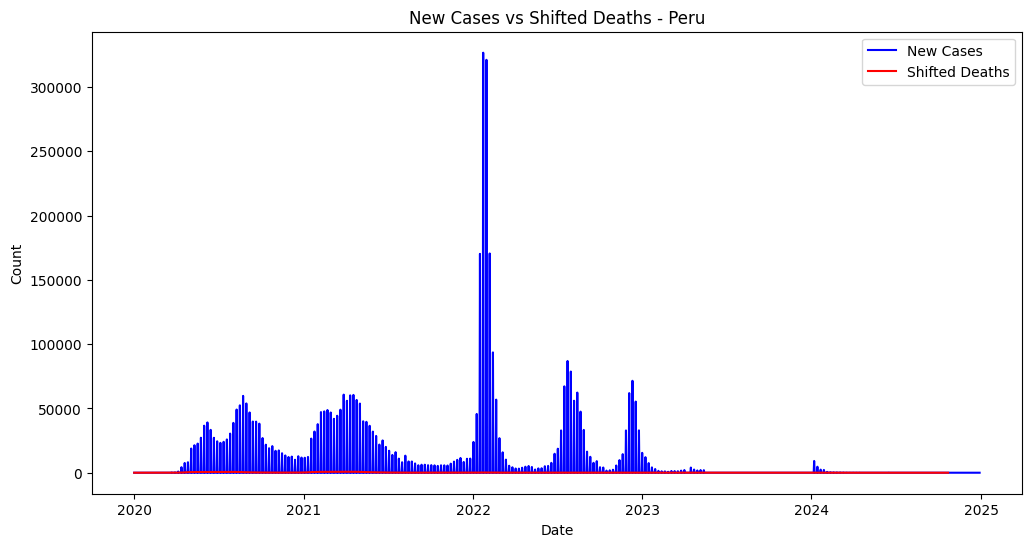

In [ ]:

# Select a country for visualization
country = 'Peru'
country_data = df[df['country'] == country]

# Plot smoothed cases and shifted deaths
plt.figure(figsize=(12, 6))
plt.plot(country_data.index, country_data['new_cases'], label='New Cases', color='blue')
plt.plot(country_data.index, country_data['new_deaths_shifted'], label='Shifted Deaths', color='red')
plt.title(f'New Cases vs Shifted Deaths - {country}')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()



In [ ]:
# Compare original and shifted values
#march 7, 2021: 4832 at 435
#march 14, 2021: 4522 at 435 (decreaes)
#march 21, 2021: 4627 at 450(increases)
#march 28, 2021: 4724 at 455
#april 4, 2021: 5142 at 460
#april 11, 2021: 5341 at 470
#april 18, 2021: 5634 at 475
#april 25, 2021: 5727 at 485
#may 2, 2021: 5363 at 490 (decrease)

#jan 30, 2022: 1118 at 765

#feb 6, 2022: 1534 at 770
#feb 13, 2022: 1319 at 775
#feb 20, 2022: 1145 at 785

#feb 27, 2022: 1119 at 790

country_data = df[df['country'] == 'Peru']
comparison = country_data[['new_deaths', 'new_deaths_shifted']].head(495)
print(comparison)

# Find the row with the maximum value in the 'new_deaths' or 'new_deaths_smoothed' column
max_deaths_row = country_data.loc[country_data['new_deaths_smoothed'].idxmax()]



            new_deaths  new_deaths_shifted
date                                      
2020-01-01         0.0            0.000000
2020-01-02         0.0            0.000000
2020-01-03         0.0            0.000000
2020-01-04         0.0            0.000000
2020-01-05         0.0            0.000000
...                ...                 ...
2021-05-05         0.0          606.142857
2021-05-06         0.0          606.142857
2021-05-07         0.0          606.142857
2021-05-08         0.0          606.142857
2021-05-09      4869.0          518.285714

[495 rows x 2 columns]


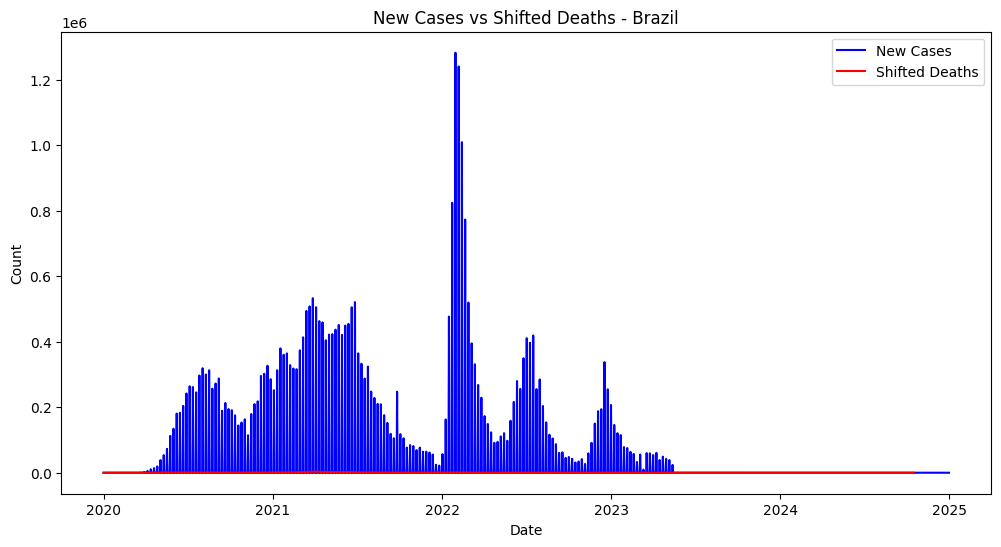

In [ ]:

# Select a country for visualization
country = 'Brazil'
country_data = df[df['country'] == country]

# Plot smoothed cases and shifted deaths
plt.figure(figsize=(12, 6))
plt.plot(country_data.index, country_data['new_cases'], label='New Cases', color='blue')
plt.plot(country_data.index, country_data['new_deaths_shifted'], label='Shifted Deaths', color='red')
plt.title(f'New Cases vs Shifted Deaths - {country}')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()



In [ ]:
# Compare original and shifted values
#jan 31, 2021: 7423 deaths at 400
#feb 14, 2021: 7455 at 415
#feb 28, 2021: 8070 at 425
#march 7, 2021: 9935 at 435
#march 14, 2021: 12335 at 440
#march 21, 2021: 15209 at 450
#march 28, 2021: 16798 at 455
#april 4, 2021: 21094 at 460
#april 11, 2021: 20512 at 470 (decrease)
#june 13, 2021: 5142 at 530
#feb 6, 2022: 4610 at 770

#feb 20, 2022: 5877 at 785

country_data = df[df['country'] == 'Brazil']
comparison = country_data[['new_deaths', 'new_deaths_shifted']].head(820)
print(comparison)

            new_deaths  new_deaths_shifted
date                                      
2020-01-01         0.0            0.000000
2020-01-02         0.0            0.000000
2020-01-03         0.0            0.000000
2020-01-04         0.0            0.000000
2020-01-05         0.0            0.000000
...                ...                 ...
2022-03-26         0.0          205.142857
2022-03-27      1768.0          160.000000
2022-03-28         0.0          160.000000
2022-03-29         0.0          160.000000
2022-03-30         0.0          160.000000

[820 rows x 2 columns]


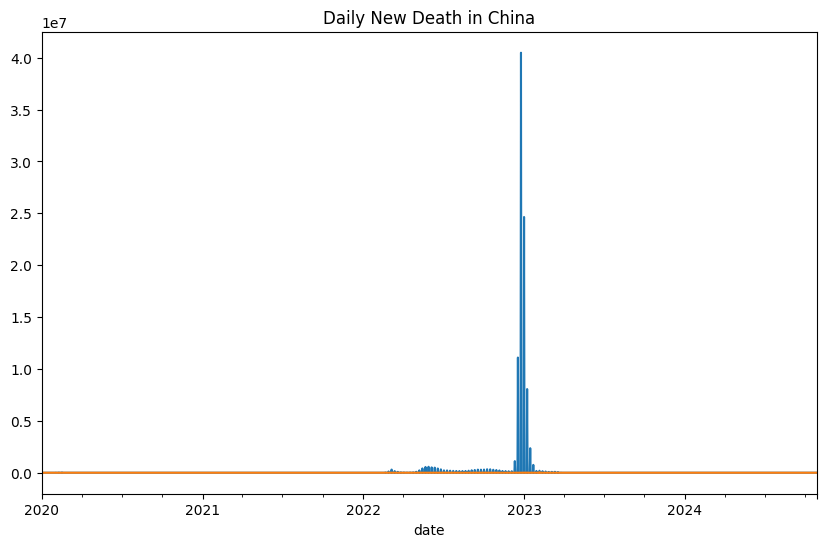

In [ ]:
country_data = df[df['country'] == 'China']
country_data['new_cases'].plot(figsize=(10, 6), title='Daily New Cases in China')
country_data['new_deaths'].plot(figsize=(10, 6), title='Daily New Death in China')
plt.show()

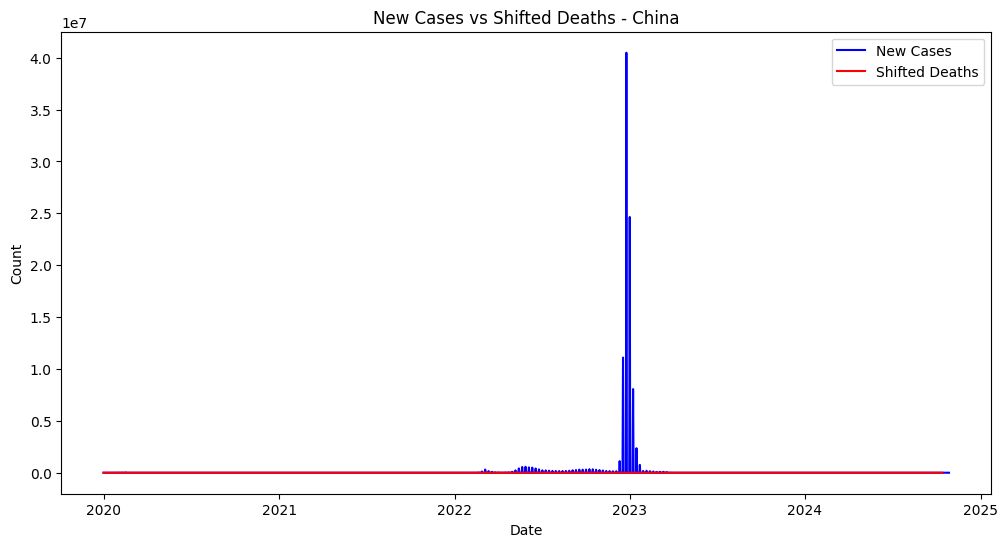

In [ ]:

# Select a country for visualization
country = 'China'
country_data = df[df['country'] == country]

# Plot smoothed cases and shifted deaths
plt.figure(figsize=(12, 6))
plt.plot(country_data.index, country_data['new_cases'], label='New Cases', color='blue')
plt.plot(country_data.index, country_data['new_deaths_shifted'], label='Shifted Deaths', color='red')
plt.title(f'New Cases vs Shifted Deaths - {country}')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()



In [ ]:
# Compare original and shifted values
#at
country_data = df[df['country'] == 'China']
comparison = country_data[['new_deaths', 'new_deaths_shifted']].head(1100)
print(comparison)


            new_deaths  new_deaths_shifted
date                                      
2020-01-01         0.0            0.142857
2020-01-02         0.0            0.142857
2020-01-03         0.0            0.142857
2020-01-04         0.0            0.142857
2020-01-05         0.0            0.285714
...                ...                 ...
2022-12-31         0.0         1855.857143
2023-01-01     17893.0            0.000000
2023-01-02         0.0            0.000000
2023-01-03         0.0            0.000000
2023-01-04         0.0            0.000000

[1100 rows x 2 columns]


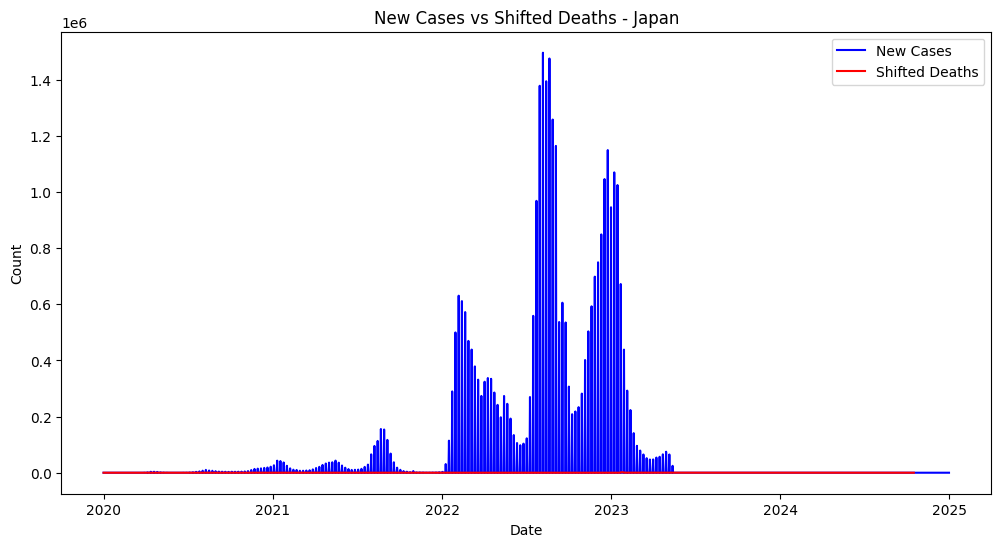

In [ ]:
# Select a country for visualization
country = 'Japan'
country_data = df[df['country'] == country]

# Plot smoothed cases and shifted deaths
plt.figure(figsize=(12, 6))
plt.plot(country_data.index, country_data['new_cases'], label='New Cases', color='blue')
plt.plot(country_data.index, country_data['new_deaths_shifted'], label='Shifted Deaths', color='red')
plt.title(f'New Cases vs Shifted Deaths - {country}')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()



In [ ]:
# Compare original and shifted values

#march 6, 2022: 1665 at 600
#aug 14, 2022: 1546 at 960
#aug 21, 2022: 1906 at 965
#aug 28, 2022: 1976 at 975
#sept 4, 2022: 2040 at 980

#jan 1, 2023: 1903 at 1100
country_data = df[df['country'] == 'Japan']
comparison = country_data[['new_deaths', 'new_deaths_shifted']].head(985)
print(comparison)

            new_deaths  new_deaths_shifted
date                                      
2020-01-01         0.0            0.000000
2020-01-02         0.0            0.000000
2020-01-03         0.0            0.000000
2020-01-04         0.0            0.000000
2020-01-05         0.0            0.000000
...                ...                 ...
2022-09-07         0.0          147.571429
2022-09-08         0.0          147.571429
2022-09-09         0.0          147.571429
2022-09-10         0.0          147.571429
2022-09-11      1501.0           90.857143

[985 rows x 2 columns]


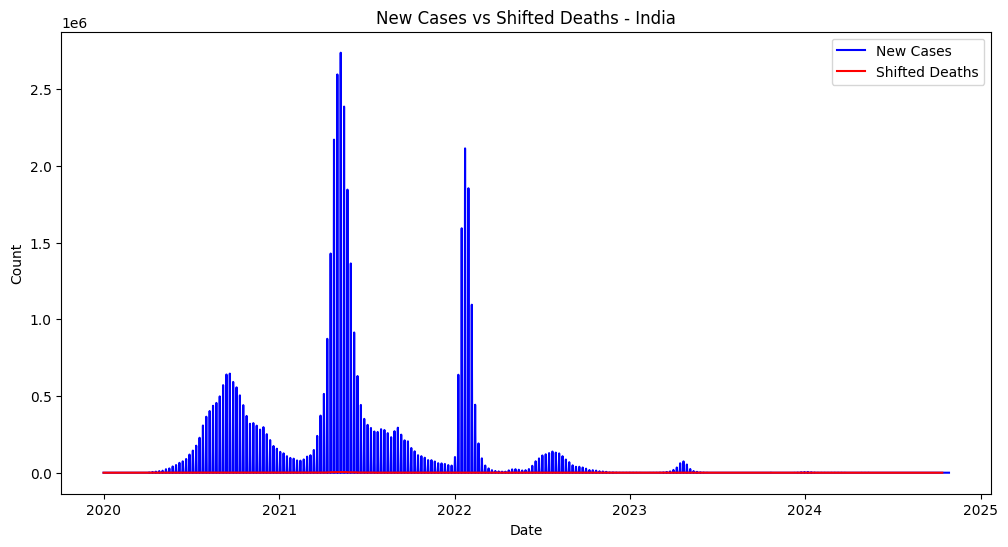

In [ ]:
# Select a country for visualization
country = 'India'
country_data = df[df['country'] == country]

# Plot smoothed cases and shifted deaths
plt.figure(figsize=(12, 6))
plt.plot(country_data.index, country_data['new_cases'], label='New Cases', color='blue')
plt.plot(country_data.index, country_data['new_deaths_shifted'], label='Shifted Deaths', color='red')
plt.title(f'New Cases vs Shifted Deaths - {country}')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()



In [ ]:
# Compare original and shifted values
#aug 8, 2021: 3142 deaths at 600
#march 6, 2022: 1312 at 800
#march 8, 2022: 4525 at 820
#july 18, 2021: 5569 at 565
#july 11, 2021: 6035 at 562
#july 4, 2021: 6254 at 555
#aug 21, 2022: 295 at 965


country_data = df[df['country'] == 'India']
comparison = country_data[['new_deaths', 'new_deaths_shifted']].head(960)
print(comparison)


            new_deaths  new_deaths_shifted
date                                      
2020-01-01         0.0            0.000000
2020-01-02         0.0            0.000000
2020-01-03         0.0            0.000000
2020-01-04         0.0            0.000000
2020-01-05         0.0            0.000000
...                ...                 ...
2022-08-13         0.0           42.142857
2022-08-14       348.0           60.285714
2022-08-15         0.0           60.285714
2022-08-16         0.0           60.285714
2022-08-17         0.0           60.285714

[960 rows x 2 columns]


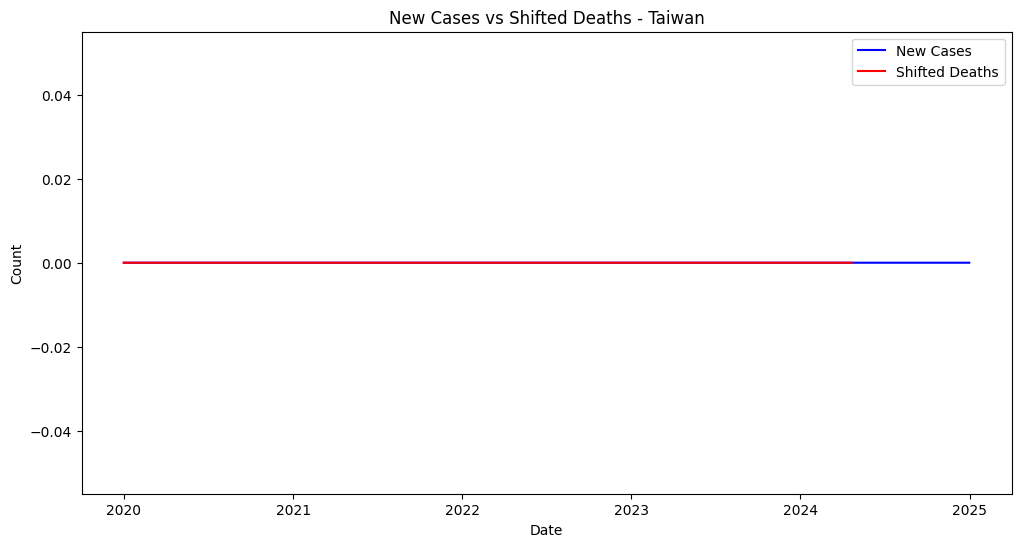

In [ ]:

# Select a country for visualization
country = 'Taiwan'
country_data = df[df['country'] == country]

# Plot smoothed cases and shifted deaths
plt.figure(figsize=(12, 6))
plt.plot(country_data.index, country_data['new_cases'], label='New Cases', color='blue')
plt.plot(country_data.index, country_data['new_deaths_shifted'], label='Shifted Deaths', color='red')
plt.title(f'New Cases vs Shifted Deaths - {country}')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()



In [ ]:
# Compare original and shifted values
#1500 generated NaN values
country_data = df[df['country'] == 'Taiwan']
comparison = country_data[['new_deaths', 'new_deaths_shifted']].head(1380)
print(comparison)


            new_deaths  new_deaths_shifted
date                                      
2020-01-01         0.0                 0.0
2020-01-02         0.0                 0.0
2020-01-03         0.0                 0.0
2020-01-04         0.0                 0.0
2020-01-05         0.0                 0.0
...                ...                 ...
2024-03-25         0.0                 0.0
2024-03-31         0.0                 0.0
2024-04-08         0.0                 0.0
2024-04-22         0.0                 0.0
2024-04-30         0.0                 NaN

[1380 rows x 2 columns]


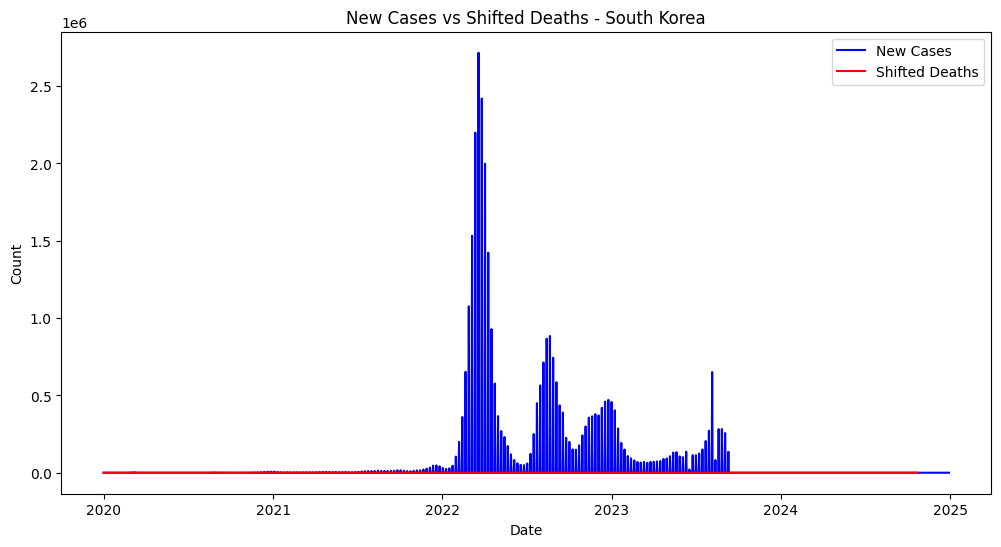

In [ ]:

# Select a country for visualization
country = 'South Korea'
country_data = df[df['country'] == country]

# Plot smoothed cases and shifted deaths
plt.figure(figsize=(12, 6))
plt.plot(country_data.index, country_data['new_cases'], label='New Cases', color='blue')
plt.plot(country_data.index, country_data['new_deaths_shifted'], label='Shifted Deaths', color='red')
plt.title(f'New Cases vs Shifted Deaths - {country}')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()



In [ ]:
# Compare original and shifted values
#march 27, 2022: 2429 at 820
country_data = df[df['country'] == 'South Korea']
comparison = country_data[['new_deaths', 'new_deaths_shifted']].head(980)
print(comparison)

# Find the row with the maximum value in the 'new_deaths' or 'new_deaths_smoothed' column
max_deaths_row = country_data.loc[country_data['new_deaths'].idxmax()]

# Display the date and the corresponding maximum death value
print(f"Date with highest death rate: {max_deaths_row.name}")
print(f"Highest death rate: {max_deaths_row['new_deaths']}")



            new_deaths  new_deaths_shifted
date                                      
2020-01-01         0.0            0.000000
2020-01-02         0.0            0.000000
2020-01-03         0.0            0.000000
2020-01-04         0.0            0.000000
2020-01-05         0.0            0.000000
...                ...                 ...
2022-09-02         0.0           48.571429
2022-09-03         0.0           48.571429
2022-09-04       504.0           51.142857
2022-09-05         0.0           51.142857
2022-09-06         0.0           51.142857

[980 rows x 2 columns]
Date with highest death rate: 2022-03-27 00:00:00
Highest death rate: 2429.0


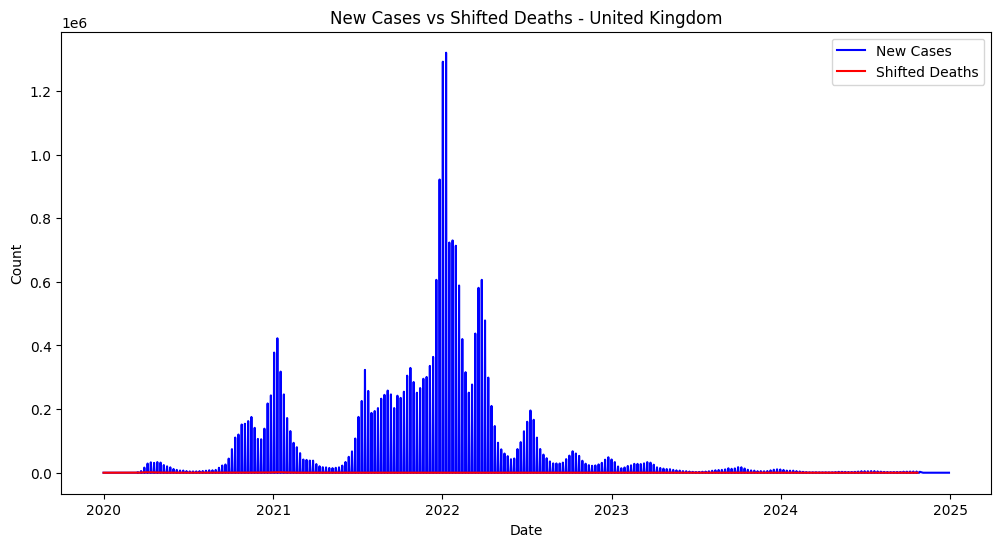

In [ ]:
# Select a country for visualization
country = 'United Kingdom'
country_data = df[df['country'] == country]

# Plot smoothed cases and shifted deaths
plt.figure(figsize=(12, 6))
plt.plot(country_data.index, country_data['new_cases'], label='New Cases', color='blue')
plt.plot(country_data.index, country_data['new_deaths_shifted'], label='Shifted Deaths', color='red')
plt.title(f'New Cases vs Shifted Deaths - {country}')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()



In [ ]:
country_data = df[df['country'] == 'United Kingdom']
#march 21, 2021: 857 death at 450
#aug 22, 2021: 738 death at 600
#nov 28, 2021: 738 death at 700
#jan 16, 2022: 1648 death at 750
#jan 23, 2022: 1650 death at 755
#march 27, 2022: 1176 death at 820
#april 3, 2022: 1272 death at 825
#april 10, 2022: 1426 death at 835
#april 17, 2022: 1340 death at 840


comparison = country_data[['new_deaths', 'new_deaths_shifted']].head(940)
print(comparison)


            new_deaths  new_deaths_shifted
date                                      
2020-01-01         0.0            0.000000
2020-01-02         0.0            0.000000
2020-01-03         0.0            0.000000
2020-01-04         0.0            0.000000
2020-01-05         0.0            0.000000
...                ...                 ...
2022-07-24      1067.0           92.714286
2022-07-25         0.0           92.714286
2022-07-26         0.0           92.714286
2022-07-27         0.0           92.714286
2022-07-28         0.0           92.714286

[940 rows x 2 columns]


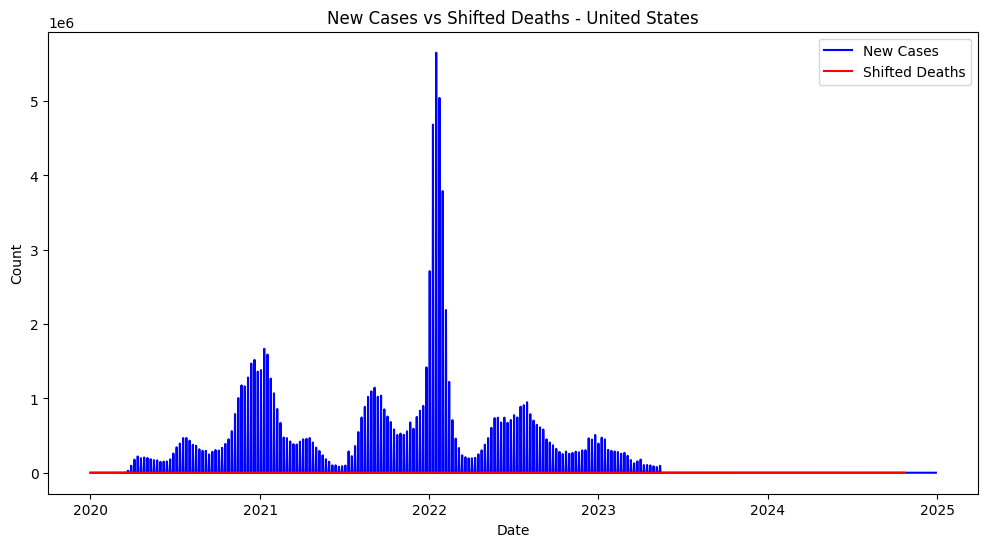

In [ ]:
# Select a country for visualization
country = 'United States'
country_data = df[df['country'] == country]

# Plot smoothed cases and shifted deaths
plt.figure(figsize=(12, 6))
plt.plot(country_data.index, country_data['new_cases'], label='New Cases', color='blue')
plt.plot(country_data.index, country_data['new_deaths_shifted'], label='Shifted Deaths', color='red')
plt.title(f'New Cases vs Shifted Deaths - {country}')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()



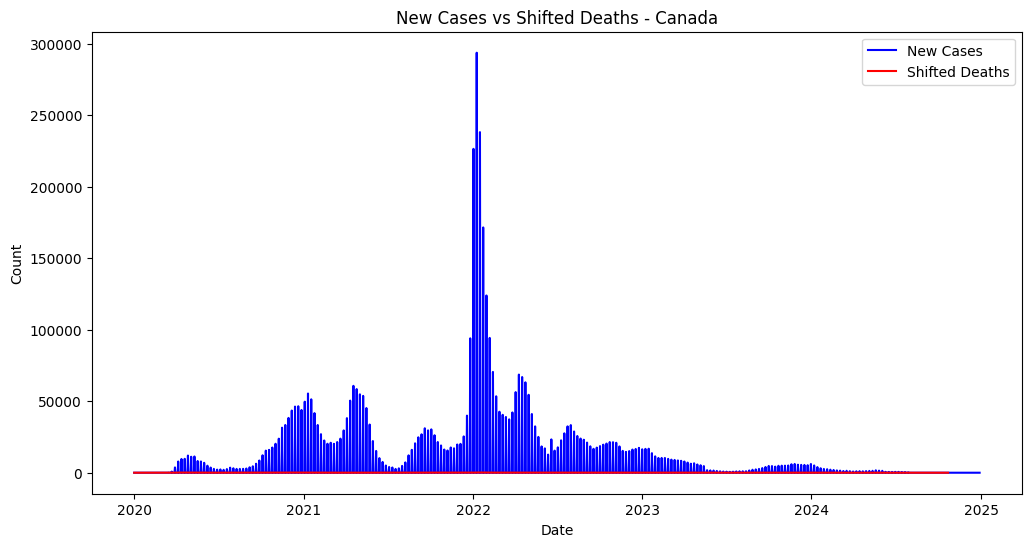

In [ ]:
# Select a country for visualization
country = 'Canada'
country_data = df[df['country'] == country]

# Plot smoothed cases and shifted deaths
plt.figure(figsize=(12, 6))
plt.plot(country_data.index, country_data['new_cases'], label='New Cases', color='blue')
plt.plot(country_data.index, country_data['new_deaths_shifted'], label='Shifted Deaths', color='red')
plt.title(f'New Cases vs Shifted Deaths - {country}')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()



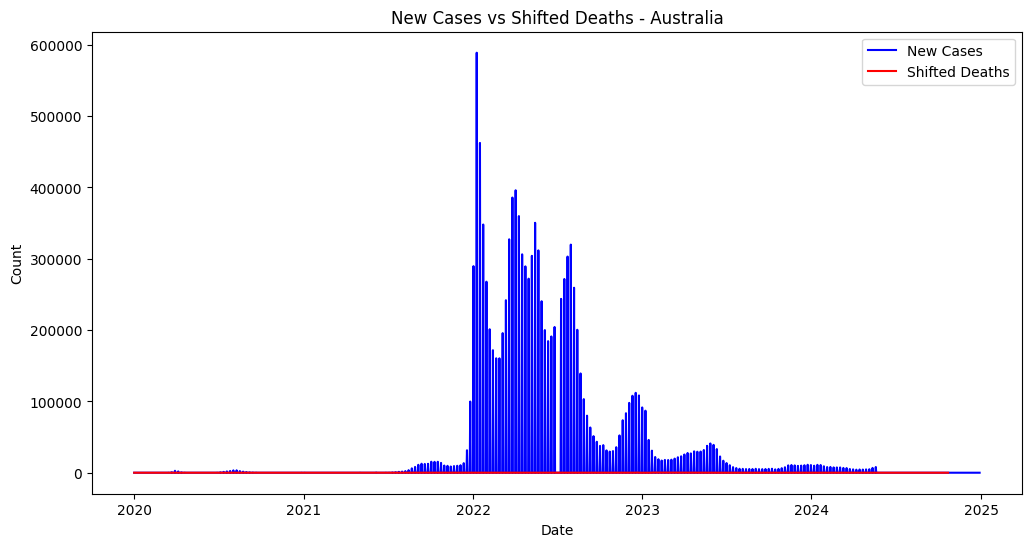

In [ ]:
# Select a country for visualization
country = 'Australia'
country_data = df[df['country'] == country]

# Plot smoothed cases and shifted deaths
plt.figure(figsize=(12, 6))
plt.plot(country_data.index, country_data['new_cases'], label='New Cases', color='blue')
plt.plot(country_data.index, country_data['new_deaths_shifted'], label='Shifted Deaths', color='red')
plt.title(f'New Cases vs Shifted Deaths - {country}')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()



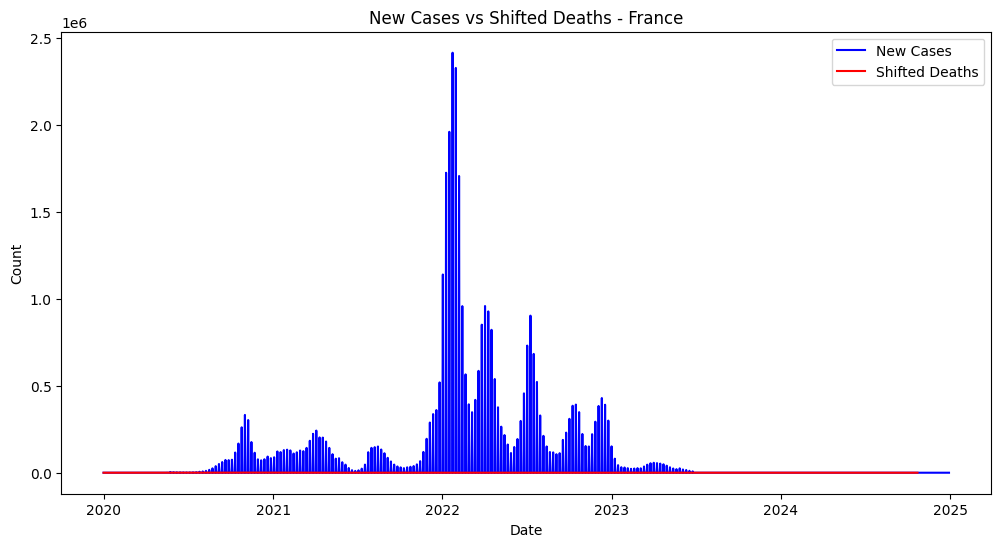

In [ ]:
# Select a country for visualization
country = 'France'
country_data = df[df['country'] == country]

# Plot smoothed cases and shifted deaths
plt.figure(figsize=(12, 6))
plt.plot(country_data.index, country_data['new_cases'], label='New Cases', color='blue')
plt.plot(country_data.index, country_data['new_deaths_shifted'], label='Shifted Deaths', color='red')
plt.title(f'New Cases vs Shifted Deaths - {country}')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()



In [ ]:
#aug 22, 2021: 699 death at 600
#jan 16, 2022: 1499 death at 750
#jan 23, 2022: 1658 death at 755
#jan 30, 2022: 1933 death at 765
#feb 5, 2022: 1996 death at 770
#march 27, 2022: 727 death at 820
#april 3, 2022: 801 death at 825
#april 10, 2022: 788 death at 835
#april 17, 2022: 852 death at 840
#july 24, 2022: 731 death at 940

country_data = df[df['country'] == 'France']
comparison = country_data[['new_deaths', 'new_deaths_shifted']].head(940)
print(comparison)


            new_deaths  new_deaths_shifted
date                                      
2020-01-01         0.0            0.000000
2020-01-02         0.0            0.000000
2020-01-03         0.0            0.000000
2020-01-04         0.0            0.000000
2020-01-05         0.0            0.000000
...                ...                 ...
2022-07-24       731.0           75.571429
2022-07-25         0.0           75.571429
2022-07-26         0.0           75.571429
2022-07-27         0.0           75.571429
2022-07-28         0.0           75.571429

[940 rows x 2 columns]


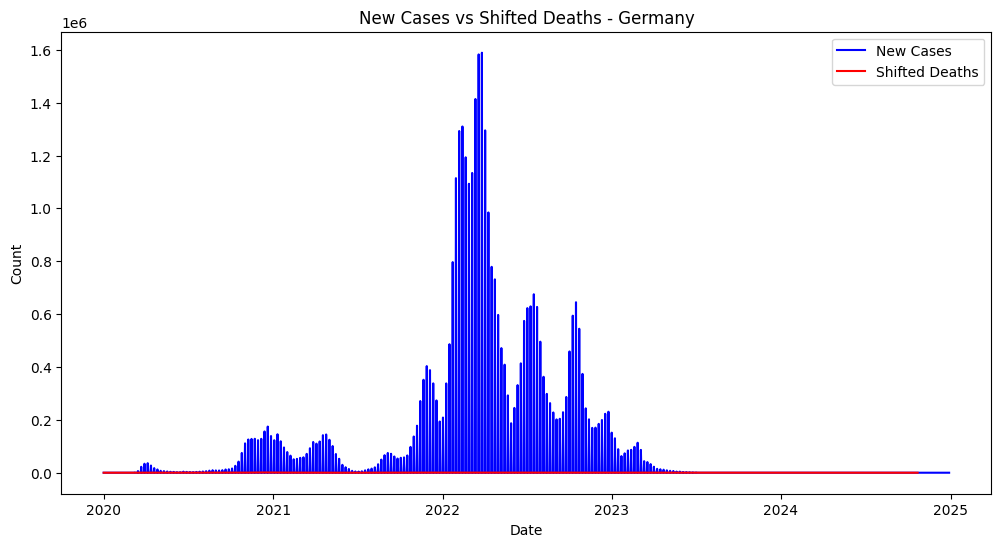

In [ ]:
# Select a country for visualization
country = 'Germany'
country_data = df[df['country'] == country]

# Plot smoothed cases and shifted deaths
plt.figure(figsize=(12, 6))
plt.plot(country_data.index, country_data['new_cases'], label='New Cases', color='blue')
plt.plot(country_data.index, country_data['new_deaths_shifted'], label='Shifted Deaths', color='red')
plt.title(f'New Cases vs Shifted Deaths - {country}')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()



In [ ]:
#nov 11, 2021: 2286 death at 685
#nov 28, 2021: 3093 death at 700
#feb 6, 2022: 1504 death at 770
#feb 13, 2022: 1705 death at 775
#feb 20, 2022: 1786 death at 785
#feb 27, 2022: 1645 death at 790
#march 20, 2022: 1934 death at 810
#march 27, 2022: 1881 death at 820
#july 24, 2022: 1129 death at 940

country_data = df[df['country'] == 'Germany']
comparison = country_data[['new_deaths', 'new_deaths_shifted']].head(945)
print(comparison)


            new_deaths  new_deaths_shifted
date                                      
2020-01-01         0.0                 0.0
2020-01-02         0.0                 0.0
2020-01-03         0.0                 0.0
2020-01-04         0.0                 0.0
2020-01-05         3.0                 0.0
...                ...                 ...
2022-07-29         0.0               113.0
2022-07-30         0.0               113.0
2022-07-31      1038.0                89.0
2022-08-01         0.0                89.0
2022-08-02         0.0                89.0

[945 rows x 2 columns]


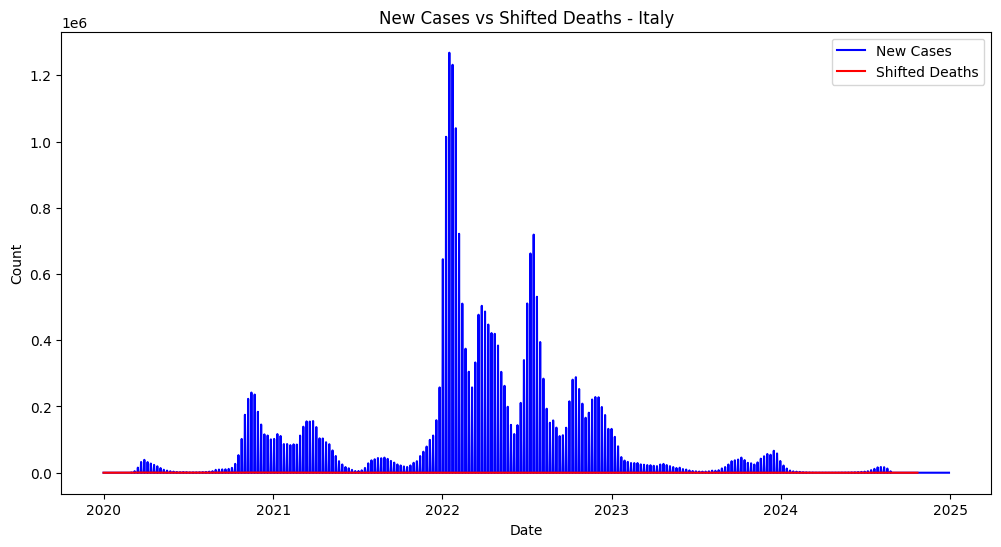

In [ ]:
# Select a country for visualization
country = 'Italy'
country_data = df[df['country'] == country]

# Plot smoothed cases and shifted deaths
plt.figure(figsize=(12, 6))
plt.plot(country_data.index, country_data['new_cases'], label='New Cases', color='blue')
plt.plot(country_data.index, country_data['new_deaths_shifted'], label='Shifted Deaths', color='red')
plt.title(f'New Cases vs Shifted Deaths - {country}')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()



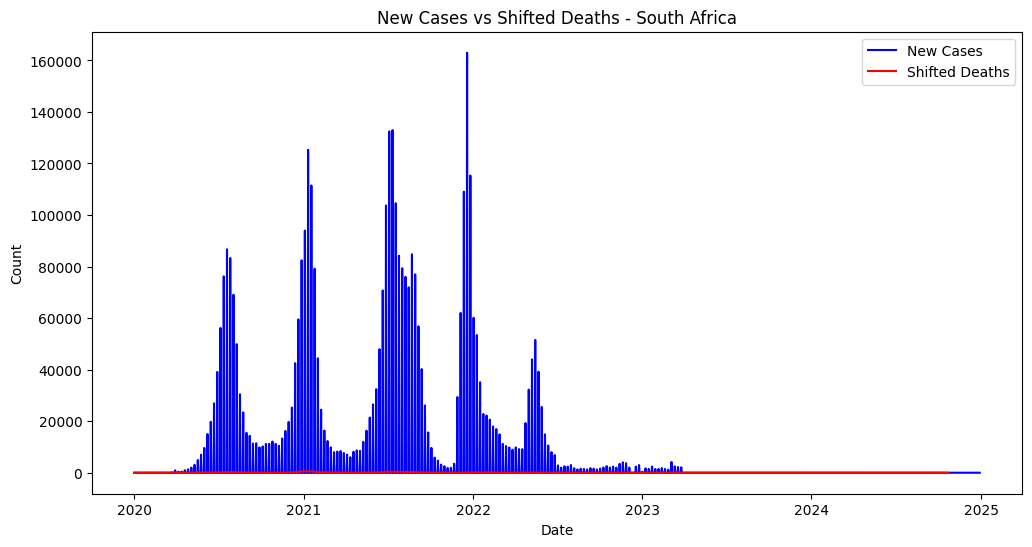

In [ ]:
# Select a country for visualization
country = 'South Africa'
country_data = df[df['country'] == country]

# Plot smoothed cases and shifted deaths
plt.figure(figsize=(12, 6))
plt.plot(country_data.index, country_data['new_cases'], label='New Cases', color='blue')
plt.plot(country_data.index, country_data['new_deaths_shifted'], label='Shifted Deaths', color='red')
plt.title(f'New Cases vs Shifted Deaths - {country}')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()



In [ ]:
#aug 9, 2020: 2057 at 225
country_data = df[df['country'] == 'South Africa']
comparison = country_data[['new_deaths', 'new_deaths_shifted']].head(225)
print(comparison)

            new_deaths  new_deaths_shifted
date                                      
2020-01-01         0.0            0.000000
2020-01-02         0.0            0.000000
2020-01-03         0.0            0.000000
2020-01-04         0.0            0.000000
2020-01-05         0.0            0.000000
...                ...                 ...
2020-08-08         0.0          209.571429
2020-08-09      2057.0          187.142857
2020-08-10         0.0          187.142857
2020-08-11         0.0          187.142857
2020-08-12         0.0          187.142857

[225 rows x 2 columns]


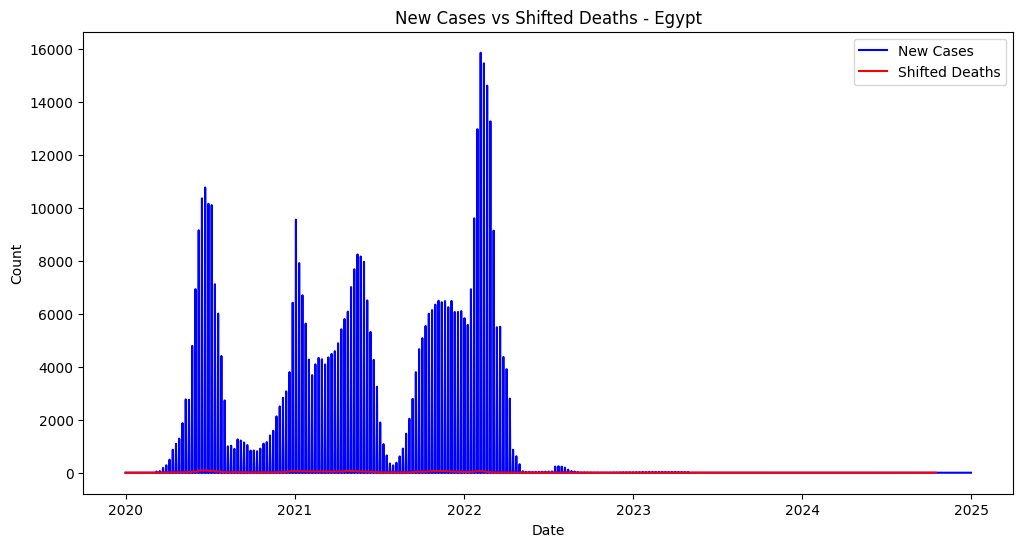

In [ ]:
# Select a country for visualization
country = 'Egypt'
country_data = df[df['country'] == country]

# Plot smoothed cases and shifted deaths
plt.figure(figsize=(12, 6))
plt.plot(country_data.index, country_data['new_cases'], label='New Cases', color='blue')
plt.plot(country_data.index, country_data['new_deaths_shifted'], label='Shifted Deaths', color='red')
plt.title(f'New Cases vs Shifted Deaths - {country}')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()



In [ ]:
#june 28, 2020: 602 at 180
country_data = df[df['country'] == 'Egypt']
comparison = country_data[['new_deaths', 'new_deaths_shifted']].head(800)
print(comparison)



            new_deaths  new_deaths_shifted
date                                      
2020-01-01         0.0                 0.0
2020-01-02         0.0                 0.0
2020-01-03         0.0                 0.0
2020-01-04         0.0                 0.0
2020-01-05         0.0                 0.0
...                ...                 ...
2022-03-06       180.0                12.0
2022-03-07         0.0                12.0
2022-03-08         0.0                12.0
2022-03-09         0.0                12.0
2022-03-10         0.0                12.0

[800 rows x 2 columns]


In [ ]:

#calculating the correlation of each individual country
correlation_results = []

for country in countries:
    country_data = df[df['country'] == country].copy()
    valid_data = country_data[['new_cases_smoothed', 'new_deaths_shifted']].dropna()
    if not valid_data.empty:
        correlation = valid_data.corr().iloc[0, 1]
        correlation_results.append({'country': country, 'correlation': correlation})

# Convert to DataFrame
correlation_df = pd.DataFrame(correlation_results)
print(correlation_df)


           country  correlation
0        Australia     0.706713
1           Brazil     0.668299
2           France     0.280235
3          Germany     0.293242
4   United Kingdom     0.262085
5            India     0.896993
6            Italy     0.344423
7             Peru     0.368872
8     South Africa     0.831288
9      South Korea     0.910943
10          Sweden     0.385792
11          Taiwan          NaN
12   United States     0.695588
13          Canada     0.618414
14           Japan     0.518802
15           Egypt     0.849975
16           China     0.281128


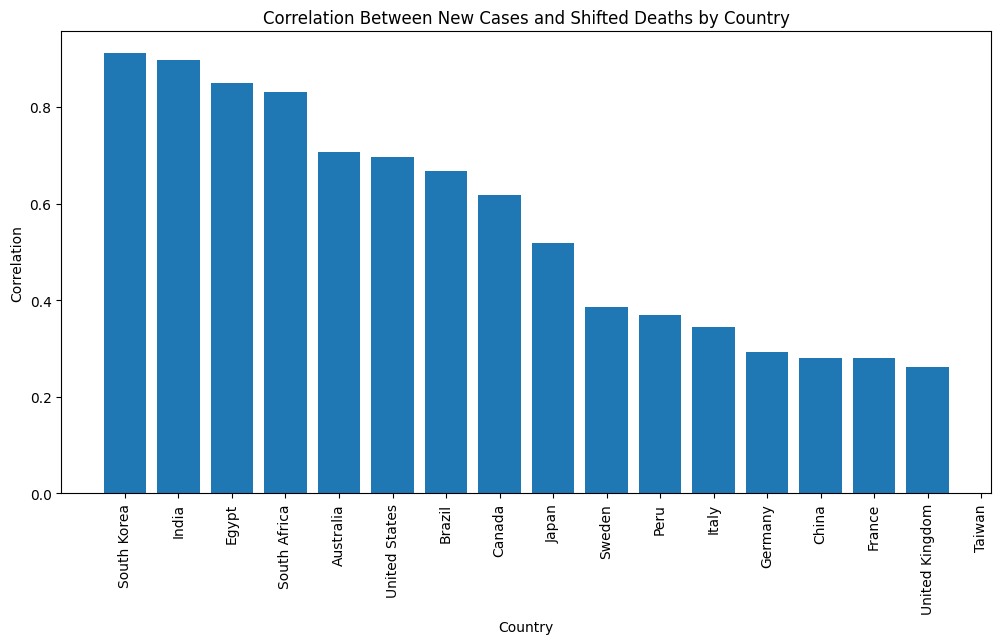

In [ ]:
#Comparing each comparing's correlation to one another
correlation_df.sort_values(by='correlation', ascending=False, inplace=True)

plt.figure(figsize=(12, 6))
plt.bar(correlation_df['country'], correlation_df['correlation'])
plt.xticks(rotation=90)
plt.title('Correlation Between New Cases and Shifted Deaths by Country')
plt.xlabel('Country')
plt.ylabel('Correlation')
plt.show()


In [ ]:
#calculating the correlation of each individual country

correlation_results = []

for country in countries:
    country_data = df[df['country'] == country]
    valid_data = country_data[['new_cases', 'new_deaths']].dropna()
    if not valid_data.empty:
        correlation = valid_data.corr().iloc[0, 1]
        correlation_results.append({'country': country, 'correlation': correlation})

# Convert to DataFrame
correlation_df = pd.DataFrame(correlation_results)
print(correlation_df)


           country  correlation
0        Australia     0.697040
1           Brazil     0.758592
2           France     0.396449
3          Germany     0.466311
4   United Kingdom     0.377272
5            India     0.835515
6            Italy     0.472922
7             Peru     0.487973
8     South Africa     0.801199
9      South Korea     0.903258
10          Sweden     0.427557
11          Taiwan          NaN
12   United States     0.722314
13          Canada     0.606268
14           Japan     0.507791
15           Egypt     0.904075
16           China     0.309166


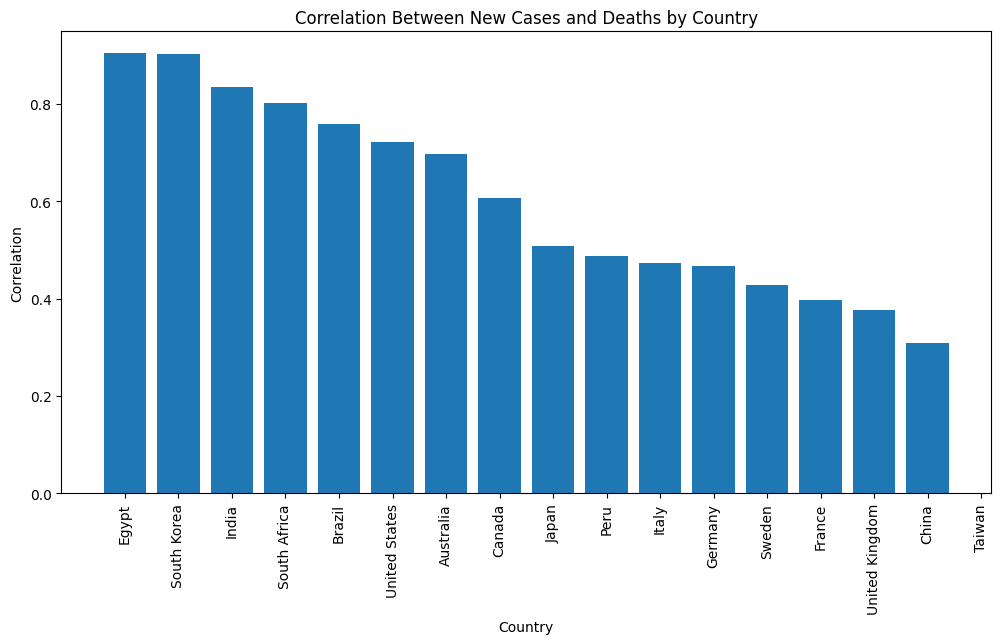

In [ ]:

#Comparing each comparing's correlation to one another
correlation_df.sort_values(by='correlation', ascending=False, inplace=True)

plt.figure(figsize=(12, 6))
plt.bar(correlation_df['country'], correlation_df['correlation'])
plt.xticks(rotation=90)
plt.title('Correlation Between New Cases and Deaths by Country')
plt.xlabel('Country')
plt.ylabel('Correlation')
plt.show()


In [ ]:
#calculating the correlation of each individual country

correlation_results = []

for country in countries:
    country_data = df[df['country'] == country]
    valid_data = country_data[['new_cases', 'new_deaths']].dropna()
    if not valid_data.empty:
        correlation = valid_data.corr().iloc[0, 1]
        correlation_results.append({'country': country, 'correlation': correlation})

# Convert to DataFrame
correlation_df = pd.DataFrame(correlation_results)
print(correlation_df)


           country  correlation
0        Australia     0.697040
1           Brazil     0.758592
2           Canada     0.606268
3            China     0.309166
4            Egypt     0.904075
5           France     0.396449
6          Germany     0.466311
7            India     0.835515
8            Italy     0.472922
9            Japan     0.507791
10            Peru     0.487973
11    South Africa     0.801199
12     South Korea     0.903258
13          Sweden     0.427557
14          Taiwan          NaN
15  United Kingdom     0.377272
16   United States     0.722314


In [ ]:
# Define the lag periods to test
lags = [7,10, 14, 21]

# Store the results
optimal_lags = []

# Loop through each country
countries = df['country'].unique()
for country in countries:
    # Create a copy of the country-specific data
    country_data = df[df['country'] == country].copy()
    max_corr = -1  # Initialize maximum correlation
    best_lag = None  # Initialize best lag

    # Test each lag
    for lag in lags:
        # Safely shift the deaths column by the current lag
        country_data[f'new_deaths_shifted_{lag}'] = country_data['new_deaths'].shift(-lag)

        # Drop missing values
        valid_data = country_data[['new_cases', f'new_deaths_shifted_{lag}']].dropna()

        # Calculate correlation if valid data exists
        if not valid_data.empty:
            corr = valid_data.corr().iloc[0, 1]

            # Update the maximum correlation and best lag
            if corr > max_corr:
                max_corr = corr
                best_lag = lag

    # Store the best lag and corresponding correlation for the country
    optimal_lags.append({'country': country, 'best_lag': best_lag, 'max_correlation': max_corr})

# Convert the results to a DataFrame
optimal_lag_df = pd.DataFrame(optimal_lags)
print(optimal_lag_df)


           country  best_lag  max_correlation
0        Australia      14.0         0.762577
1           Brazil       7.0         0.767762
2           Canada      21.0         0.729133
3            China       7.0         0.426850
4            Egypt       7.0         0.908170
5           France      14.0         0.423381
6          Germany       7.0         0.462410
7            India      14.0         0.911521
8            Italy      14.0         0.505517
9            Japan      21.0         0.615636
10            Peru       7.0         0.498780
11    South Africa      14.0         0.865980
12     South Korea       7.0         0.940797
13          Sweden      21.0         0.484096
14          Taiwan       NaN        -1.000000
15  United Kingdom      14.0         0.412501
16   United States      14.0         0.775219


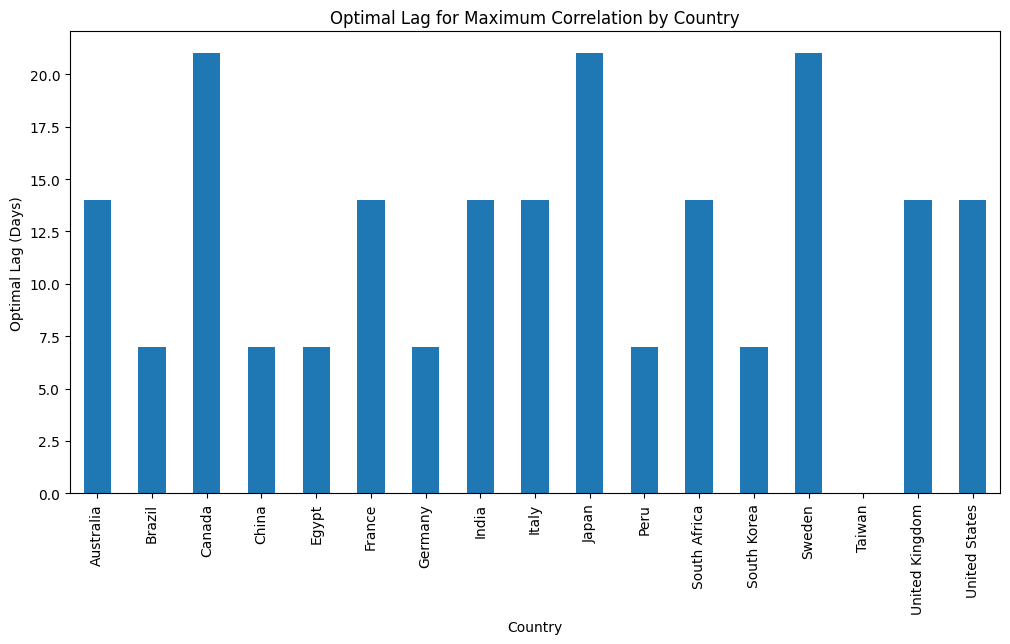

In [ ]:
# this show the optimal lag and corresponding correlation
optimal_lag_df.plot(kind='bar', x='country', y='best_lag', legend=False, figsize=(12, 6))
plt.title('Optimal Lag for Maximum Correlation by Country')
plt.ylabel('Optimal Lag (Days)')
plt.xlabel('Country')
plt.show()


In [ ]:
df = df.reset_index()


In [ ]:
#predict smoothed new cases

target_variable = 'new_cases_smoothed'

country = 'Australia'
country_data = df[df['country'] == country][['date', target_variable]].dropna()
country_data.set_index('date', inplace=True)


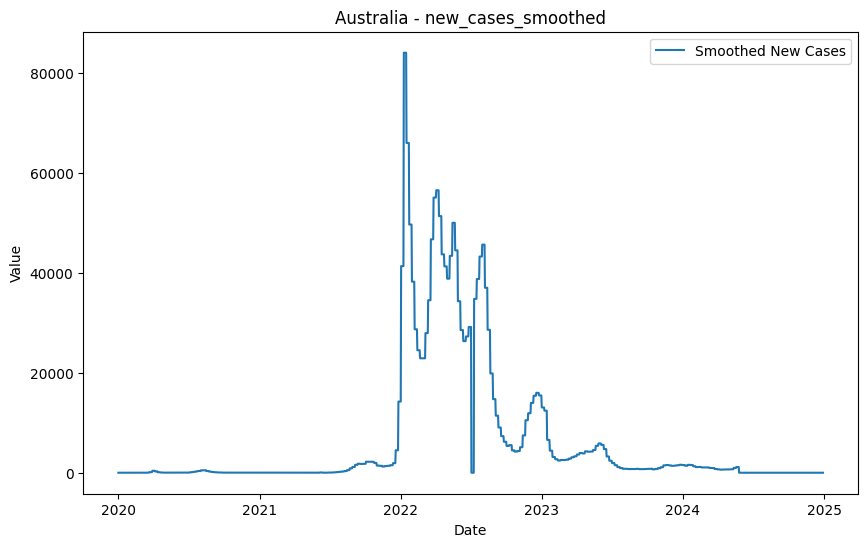

In [ ]:
#visualize it
plt.figure(figsize=(10, 6))
plt.plot(country_data[target_variable], label='Smoothed New Cases')
plt.title(f'{country} - {target_variable}')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

#to check if the smoothed data is stationary using the Augmented Dickey-Fuller (ADF)
result = adfuller(country_data[target_variable])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] > 0.05:
    print("Data is non-stationary")
else:
    print("Data is stationary")


ADF Statistic: -3.0916604324693333
p-value: 0.02717654126202515
Data is stationary


In [ ]:
#calculated the difference
print('d = 0')
result = adfuller(country_data[target_variable])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
## Get the first difference
print('\n d = 1')
df1 = country_data[target_variable].diff().dropna()
result = adfuller(df1)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
## Get the second difference
print('\n d = 2')
df2 = df1.diff().dropna()
result = adfuller(df2)
print('ADF Statistic:', result[0])
print('p-value:', result[1])


d = 0
ADF Statistic: -3.0916604324693333
p-value: 0.02717654126202515

 d = 1
ADF Statistic: -9.921665442588566
p-value: 2.979725137497973e-17

 d = 2
ADF Statistic: -13.3158317656691
p-value: 6.606206473076856e-25


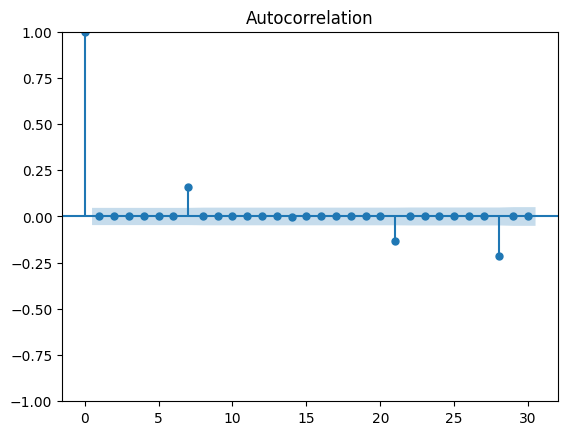

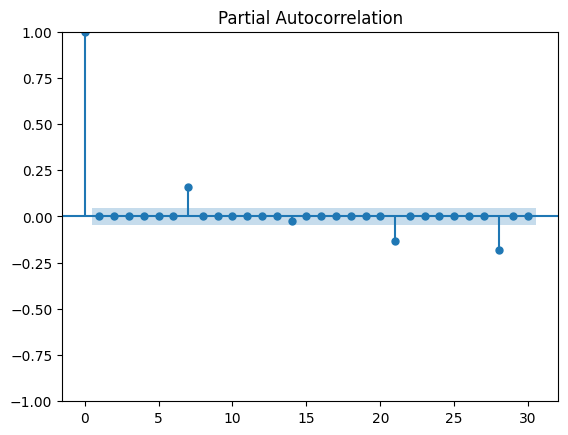

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Calculate the differenced column
country_data['diff'] = country_data[target_variable].diff().dropna()



plot_acf(country_data['diff'].dropna(), lags=30)
plot_pacf(country_data['diff'].dropna(), lags=30)
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


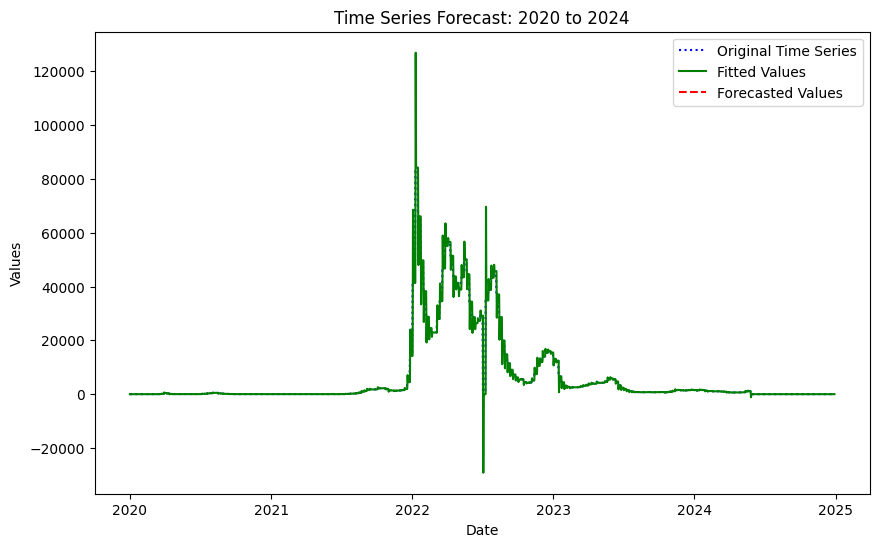

In [ ]:
# Generate a date range for the forecasted values
forecast_dates = pd.date_range(
    start=country_data.index[-1],  # Starts from the last date in your dataset
    periods=30,  # Number of forecast steps
    freq='ME'
)

p = 0; d = 2; q = 0 # ARIMA component orders
model = ARIMA(country_data[target_variable], order=(p, d, q))
results = model.fit()

# Convert forecast to a DataFrame and assign the dates
forecast_df = pd.DataFrame(fc, index=forecast_dates, columns=['Forecasted Values'])
# Fit an ARIMA model


# Plot the results
plt.figure(figsize=(10, 6))

# Plot original time series
plt.plot(country_data[target_variable], label='Original Time Series', color='blue', linestyle='dotted')

# Plot fitted values
plt.plot(results.fittedvalues, label='Fitted Values', color='green')

# Plot forecasted values
plt.plot(forecast_df, label='Forecasted Values', color='red', linestyle='dashed')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Time Series Forecast: 2020 to 2024')
plt.legend()
plt.show()

